In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Face_data.zip'
unzip_dir = '/content/Face_data'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Data unzipped successfully!")

Data unzipped successfully!


In [4]:
import sys
print(sys.version)


3.8.19 (default, Mar 20 2024, 19:55:45) [MSC v.1916 64 bit (AMD64)]


In [2]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory="C:/Users/Lenovo/Desktop/Face_identification/Main_data/Main_data/train",
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory="C:/Users/Lenovo/Desktop/Face_identification/Main_data/Main_data/val",
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory="C:/Users/Lenovo/Desktop/Face_identification/Main_data/Main_data/test",
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(256, 256)
)

Found 25577 files belonging to 7 classes.
Found 3195 files belonging to 7 classes.
Found 3204 files belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, Model

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# for layer in base_model.layers:
#     layer.trainable = False

for layer in base_model.layers[-30:]:
    layer.trainable = True

inputs = base_model.input
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(7, activation="softmax")(x)
mobilenet_model = Model(inputs=inputs, outputs=outputs)
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()

<ipython-input-7-9c5b8cd9fba4>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 12,745,287 (48.62 MB)

 Trainable params: 12,710,919 (48.49 MB)

 Non-trainable params: 34,368 (134.25 KB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=1,restore_best_weights=True)

In [ ]:
mobilenet = mobilenet_model.fit(train_ds, validation_data=validation_ds, epochs=10,callbacks=[early_stopping])

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 186s 172ms/step - accuracy: 0.9864 - loss: 0.0498 - val_accuracy: 0.1809 - val_loss: 10.9242
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 112s 140ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.3449 - val_loss: 6.0508
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 143s 142ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.4529 - val_loss: 3.2334
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 114s 142ms/step - accuracy: 0.9982 - loss: 0.0069 - val_accuracy: 0.6905 - val_loss: 0.7239
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 142s 143ms/step - accuracy: 0.9989 - loss: 0.0027 - val_accuracy: 0.2413 - val_loss: 5.4505


In [ ]:
mobilenet_model.save('/content/drive/MyDrive/Face_model_mobilenet.keras')

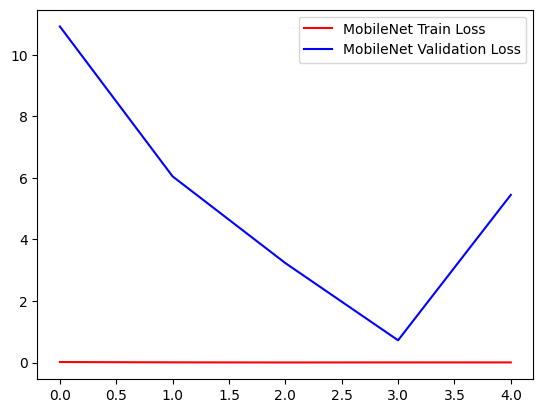

In [ ]:
import matplotlib.pyplot as plt

plt.plot(mobilenet.history['loss'], color='red', label='MobileNet Train Loss')
plt.plot(mobilenet.history['val_loss'], color='blue', label='MobileNet Validation Loss')
plt.legend()
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, Model

base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# for layer in base_model.layers:
#     layer.trainable = False

for layer in base_model.layers[-4:]:
    layer.trainable = True


inputs = base_model.input
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(7, activation="softmax")(x)
vgg16_model = Model(inputs=inputs, outputs=outputs)
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [4]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [ ]:
vgg16 = vgg16_model.fit(train_ds, validation_data=validation_ds, epochs=10,callbacks=[early_stopping])

Epoch 1/10
  9/800 [..............................] - ETA: 3:51:31 - loss: 1.2696 - accuracy: 0.6007

In [ ]:
vgg16_model.save('/content/drive/MyDrive/Face_model_vgg16.keras')

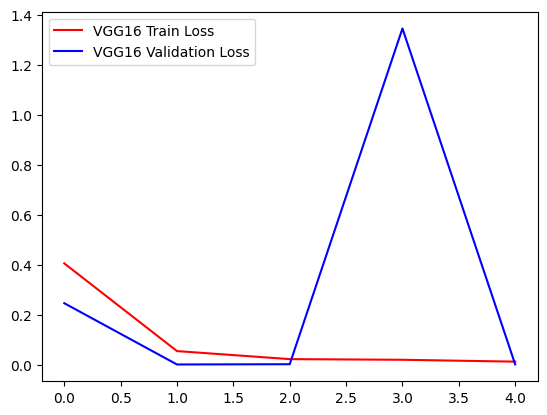

In [ ]:
import matplotlib.pyplot as plt

plt.plot(vgg16.history['loss'], color='red', label='VGG16 Train Loss')
plt.plot(vgg16.history['val_loss'], color='blue', label='VGG16 Validation Loss')
plt.legend()
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, Model

base_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in base_model.layers:
    layer.trainable = False

# for layer in base_model.layers[-4:]:
#     layer.trainable = True

inputs = base_model.input
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(7, activation="softmax")(x)
resnet50v2_model = Model(inputs=inputs, outputs=outputs)
resnet50v2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50v2_model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 64, 64, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 64, 64, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 66, 66, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 40,343,559 (153.90 MB)

 Trainable params: 16,778,503 (64.00 MB)

 Non-trainable params: 23,565,056 (89.89 MB)

In [4]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [5]:
resnet50v2 = resnet50v2_model.fit(train_ds, validation_data=validation_ds,epochs=10,callbacks=[early_stopping])

Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 108s 116ms/step - accuracy: 0.9732 - loss: 0.1322 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 116s 94ms/step - accuracy: 0.9998 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 2.4829e-04
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 74s 93ms/step - accuracy: 0.9998 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 9.1322e-04
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 85s 97ms/step - accuracy: 0.9998 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 3.9830e-04
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 77s 96ms/step - accuracy: 0.9999 - loss: 0.0019 - val_accuracy: 0.9818 - val_loss: 0.0618


In [6]:
resnet50v2_model.save('/content/drive/MyDrive/Face_model_resnet50v2.keras')

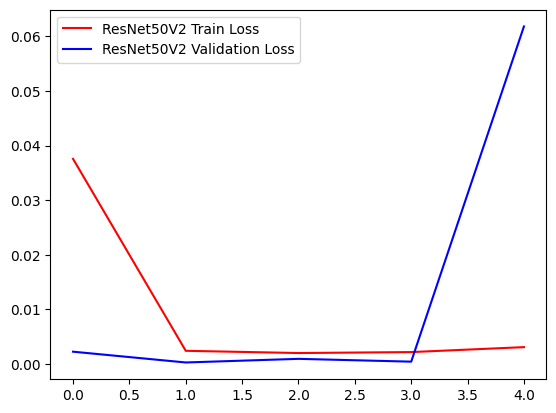

In [9]:
import matplotlib.pyplot as plt

plt.plot(resnet50v2.history['loss'], color='red', label='ResNet50V2 Train Loss')
plt.plot(resnet50v2.history['val_loss'], color='blue', label='ResNet50V2 Validation Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/Face_model_mobilenet.keras")
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 38,166,740 (145.59 MB)

 Trainable params: 12,710,790 (48.49 MB)

 Non-trainable params: 34,368 (134.25 KB)

 Optimizer params: 25,421,582 (96.98 MB)